# Finance Data Reader

- 국내 주식가격, 주가지수, 환율, 암호화페 데이타 제공 
- https://financedata.github.io/posts/finance-data-reader-users-guide.html
- 설치 
```
pip install pandas
pip install -U finance-datareader
```
- 결과형태가 판다스의 데이타프레임 

In [ ]:
# !pip install -U finance-datareader

In [ ]:
# finance-datareader 목록 확인 

In [2]:
# pip list

In [3]:
# 관련 모듈 임포트 

import pandas as pd
import FinanceDataReader as fdr

In [4]:
fdr.__version__

'0.9.30'

In [5]:
pd.__version__

'1.0.5'

# 종목코드 

데이타프레임명 = fdr.StockListing(심볼명)

```
한국 
심볼	거래소
KRX	KRX 종목 전체
KOSPI	KOSPI 종목
KOSDAQ	KOSDAQ 종목
KONEX	KONEX 종목

미국
심볼	거래소
NASDAQ	나스닥 종목
NYSE	뉴욕 증권거래소 종목
AMEX	AMEX 종목
SP500	S&P 500 종목
```

In [6]:
df_kospi = fdr.StockListing('KOSPI')

# 전체 갯수 확인 
# 데이타프레임명.shape
df_kospi.shape

(5166, 10)

In [8]:
df_kospi.head(2)

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시


In [9]:
df_kospi.tail(2)

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
6830,000545,KOSPI,흥국화재우,NaN,NaN,NaT,NaN,NaN,NaN,NaN
6831,003280,KOSPI,흥아해운,해상 운송업,외항화물운송업(케미컬탱커),1976-06-29,12월,이환구,http://www.heung-a.com,서울특별시


In [10]:
df_kosdaq = fdr.StockListing('KOSDAQ')
df_kosdaq.shape

(1536, 10)

In [11]:
df_kosdaq.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
5,211270,KOSDAQ,AP위성,통신 및 방송 장비 제조업,위성통신 단말기,2016-03-04,12월,류장수,http://www.apsi.co.kr,서울특별시
53,013720,KOSDAQ,CBI,자동차 신품 부품 제조업,엔진부품,1993-12-29,12월,오경원,http://www.cheongbo.co.kr,인천광역시


In [12]:
# 조건 필터링 
# 데이타프레임[조건식]
# 조건식은 데이타프레임[컬럼명] 비교 또는 관계연산자 데이타값] 
# 삼성전자 정보만 출력 
df_kospi[df_kospi['Name'] == '삼성전자']

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
3735,005930,KOSPI,삼성전자,통신 및 방송 장비 제조업,"IMT2000 서비스용 동기식 기지국,교환국장비,데이터단말기,동영상휴대폰,핵심칩,반...",1975-06-11,12월,"김기남, 김현석, 고동진",http://www.sec.co.kr,경기도


In [13]:
df_kospi[df_kospi['Name'] == '삼성전기']

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
3733,009150,KOSPI,삼성전기,전자부품 제조업,"영상,음향,통신장비,모듈,다층인쇄회로기판,적층세라믹콘덴서,고주파필터,전압제어발진기,...",1979-02-27,12월,경계현,http://www.sem.samsung.co.kr,경기도


In [15]:
df_nasdaq = fdr.StockListing('NASDAQ')
df_nasdaq.shape

100%|█████████████████████████████████████████████████████████████████████████████| 4201/4201 [00:07<00:00, 535.64it/s]


(4201, 4)

In [16]:
df_nasdaq.head()

,Symbol,Name,Industry,IndustryCode
0,AAPL,Apple Inc,"컴퓨터, 전화 및 가전제품",571060
1,MSFT,Microsoft Corp,소프트웨어 및 IT서비스,572010
2,AMZN,Amazon.com Inc,다양한 소매업,534020
3,GOOGL,Alphabet Inc Class A,소프트웨어 및 IT서비스,572010
4,FB,Facebook Inc Class A,소프트웨어 및 IT서비스,572010


In [18]:
# 판다스의 비교연산자 >, ==, <, <=, >=
# 판다스의 논리연산자  or => |  , and => &
# 삼성전기 또는 삼성전자 
df_kospi[(df_kospi['Name'] == '삼성전기') | (df_kospi['Name'] == '삼성전자')]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
3733,009150,KOSPI,삼성전기,전자부품 제조업,"영상,음향,통신장비,모듈,다층인쇄회로기판,적층세라믹콘덴서,고주파필터,전압제어발진기,...",1979-02-27,12월,경계현,http://www.sem.samsung.co.kr,경기도
3735,005930,KOSPI,삼성전자,통신 및 방송 장비 제조업,"IMT2000 서비스용 동기식 기지국,교환국장비,데이터단말기,동영상휴대폰,핵심칩,반...",1975-06-11,12월,"김기남, 김현석, 고동진",http://www.sec.co.kr,경기도


In [19]:
# 컬럼명만 확인하기 
# 데이타프레임명.columns
df_kospi.columns

Index(['Symbol', 'Market', 'Name', 'Sector', 'Industry', 'ListingDate',
       'SettleMonth', 'Representative', 'HomePage', 'Region'],
      dtype='object')

In [21]:
df_kosdaq.columns

Index(['Symbol', 'Market', 'Name', 'Sector', 'Industry', 'ListingDate',
       'SettleMonth', 'Representative', 'HomePage', 'Region'],
      dtype='object')

In [20]:
df_nasdaq.columns

Index(['Symbol', 'Name', 'Industry', 'IndustryCode'], dtype='object')

In [23]:
# Region 컬럼값은 어떤 것들로 이루어져 있는가?
# 데이타프레임명[컬럼명].value_counts()
df_kosdaq['Region'].value_counts()

서울특별시      533
경기도        512
충청남도        67
충청북도        61
인천광역시       57
경상남도        47
경상북도        40
부산광역시       39
대전광역시       37
대구광역시       31
강원도         16
전라북도        15
전라남도        12
울산광역시        9
광주광역시        9
홍콩           8
세종특별자치시      6
미국           6
케이맨 제도       4
일본           3
제주특별자치도      2
Name: Region, dtype: int64

In [24]:
df_kospi['Region'].value_counts()

서울특별시      416
경기도        151
경상남도        42
부산광역시       36
충청남도        26
인천광역시       25
대구광역시       21
경상북도        20
울산광역시       17
충청북도        15
전라북도        12
광주광역시        9
제주특별자치도      7
대전광역시        7
전라남도         7
강원도          4
세종특별자치시      3
싱가포르         1
케이맨 제도       1
Name: Region, dtype: int64

In [25]:
df_kosdaq[df_kosdaq['Region'] == '케이맨 제도']

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
1859,900280,KOSDAQ,골든센츄리,기타 금융업,트랙터용 휠 및 타이어,2016-10-19,12월,주승화,http://www.jsj-wheel.co.kr,케이맨 제도
1892,900070,KOSDAQ,글로벌에스엠,기타 금융업,"자회사 제품 : IT기기용 정밀 화스너부품(스크류, 샤프트, 스프링)",2009-12-23,12월,나윤복,http://www.globalsmtech.com,케이맨 제도
4166,900120,KOSDAQ,씨케이에이치,기타 금융업,건강보조식품,2010-03-31,06월,린진성,NaN,케이맨 제도
5078,900250,KOSDAQ,크리스탈신소재,기타 금융업,"합성운모 플레이크, 파우더, 테이프",2016-01-28,12월,다이중치우 (DAI ZHONG QIU),http://www.crystalnewmaterial.com,케이맨 제도


In [26]:
df_kospi['Sector'].value_counts()

기타 금융업               60
자동차 신품 부품 제조업        45
의약품 제조업              40
1차 철강 제조업            35
기타 화학제품 제조업          30
                     ..
음식점업                  1
일반 및 생활 숙박시설 운영업      1
가전제품 및 정보통신장비 소매업     1
철도장비 제조업              1
건물설비 설치 공사업           1
Name: Sector, Length: 129, dtype: int64

In [27]:
# 기타 금융업 이면서 서울특별시 
df_kospi[(df_kospi['Sector'] == '기타 금융업') 
             & (df_kospi['Region'] == '서울특별시')]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
48,027410,KOSPI,BGF,기타 금융업,지주회사,2014-05-19,12월,홍정국,http://www.bgf.co.kr,서울특별시
54,001040,KOSPI,CJ,기타 금융업,지주회사,1973-06-29,12월,"손경식, 김홍기",http://www.cj.net,서울특별시
81,000210,KOSPI,DL,기타 금융업,지주회사,1976-02-02,12월,배원복,http://www.dlholdings.co.kr,서울특별시
113,078930,KOSPI,GS,기타 금융업,지주회사/부동산 임대,2004-08-05,12월,"허태수, 홍순기 (각자 대표이사)",NaN,서울특별시
146,012630,KOSPI,HDC,기타 금융업,"토목공사,건축공사,아파트분양사업,재개발/재건축사업",1996-10-16,12월,"정몽규, 유병규",http://www.i-park.com,서울특별시
174,096760,KOSPI,JW홀딩스,기타 금융업,의약품 수출입업,2007-07-31,12월,"이경하, 한성권",http://jw-holdings.co.kr,서울특별시
1058,105560,KOSPI,KB금융,기타 금융업,-,2008-10-10,12월,윤종규,http://www.kbfg.com,서울특별시
1070,009440,KOSPI,KC그린홀딩스,기타 금융업,"환경방지오염시설(전기집진기,배연탈황설비,여과집진기,세정식집진기),제어장치 제조,설치",1994-11-05,12월,이태영,http://www.kcgreenholdings.com,서울특별시
1304,003550,KOSPI,LG,기타 금융업,지주회사,1970-02-13,12월,"구광모, 권영수",http://www.lg.co.kr,서울특별시


In [28]:
# 데이타프레임의 각 컬럼의 데이타형 확인하기 1
df_kospi.dtypes

Symbol                    object
Market                    object
Name                      object
Sector                    object
Industry                  object
ListingDate       datetime64[ns]
SettleMonth               object
Representative            object
HomePage                  object
Region                    object
dtype: object

In [29]:
# 데이타프레임의 각 컬럼의 데이타형 확인하기 2
df_kospi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5166 entries, 1 to 6831
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Symbol          5166 non-null   object        
 1   Market          5166 non-null   object        
 2   Name            5166 non-null   object        
 3   Sector          820 non-null    object        
 4   Industry        807 non-null    object        
 5   ListingDate     820 non-null    datetime64[ns]
 6   SettleMonth     820 non-null    object        
 7   Representative  820 non-null    object        
 8   HomePage        790 non-null    object        
 9   Region          820 non-null    object        
dtypes: datetime64[ns](1), object(9)
memory usage: 444.0+ KB


In [31]:
df_nasdaq.head()

,Symbol,Name,Industry,IndustryCode
0,AAPL,Apple Inc,"컴퓨터, 전화 및 가전제품",571060
1,MSFT,Microsoft Corp,소프트웨어 및 IT서비스,572010
2,AMZN,Amazon.com Inc,다양한 소매업,534020
3,GOOGL,Alphabet Inc Class A,소프트웨어 및 IT서비스,572010
4,FB,Facebook Inc Class A,소프트웨어 및 IT서비스,572010


In [30]:
df_nasdaq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4201 entries, 0 to 4200
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Symbol        4201 non-null   object
 1   Name          4201 non-null   object
 2   Industry      4199 non-null   object
 3   IndustryCode  4199 non-null   object
dtypes: object(4)
memory usage: 131.4+ KB


In [33]:
# 데이타프레임의 정보 확인 
df_kospi.describe()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
count,5166,5166,5166,820,807,820,820,820,790,820
unique,5166,1,5166,129,764,652,8,797,776,19
top,117680,KOSPI,신한 인버스 Russell 2000 ETN,기타 금융업,지주회사,1996-07-03 00:00:00,12월,김종원,http://www.crown.co.kr,서울특별시
freq,1,5166,1,60,19,8,791,2,2,416
first,NaN,NaN,NaN,NaN,NaN,1956-03-03 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2021-10-13 00:00:00,NaN,NaN,NaN,NaN


In [34]:
df_kospi.dtypes

Symbol                    object
Market                    object
Name                      object
Sector                    object
Industry                  object
ListingDate       datetime64[ns]
SettleMonth               object
Representative            object
HomePage                  object
Region                    object
dtype: object

In [35]:
# 시계열 데이타 컬럼 
df_kospi['ListingDate']

1      2015-08-21
2      1999-08-11
6             NaT
7             NaT
8             NaT
          ...    
6824   2002-10-07
6828   1974-12-05
6829          NaT
6830          NaT
6831   1976-06-29
Name: ListingDate, Length: 5166, dtype: datetime64[ns]

In [36]:
# 시계열 데이타 컬럼 
df_kospi['ListingDate'].value_counts()

1996-07-03    8
1976-06-30    8
1996-12-24    7
1976-12-28    6
1976-06-26    5
             ..
1986-03-31    1
1988-09-29    1
1984-08-11    1
1975-06-24    1
1989-09-09    1
Name: ListingDate, Length: 652, dtype: int64

In [42]:
# ListingDate  컬럼에서 2000년 12월 이후  데이타 
df_kospi[df_kospi['ListingDate'] >= '2000-12']

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
48,027410,KOSPI,BGF,기타 금융업,지주회사,2014-05-19,12월,홍정국,http://www.bgf.co.kr,서울특별시
49,282330,KOSPI,BGF리테일,종합 소매업,체인화 편의점,2017-12-08,12월,이건준,http://www.bgfretail.com,서울특별시
50,138930,KOSPI,BNK금융지주,기타 금융업,금융지주회사,2011-03-30,12월,김지완,http://www.bnkfg.com,부산광역시
55,079160,KOSPI,CJ CGV,"영화, 비디오물, 방송프로그램 제작 및 배급업","영화상영,영화관 운영",2004-12-24,12월,허민회,http://www.cgv.co.kr,서울특별시
...,...,...,...,...,...,...,...,...,...,...
6802,298000,KOSPI,효성화학,기초 화학물질 제조업,-,2018-07-13,12월,이건종,http://www.hyosungchemical.com,서울특별시
6803,093370,KOSPI,후성,기초 화학물질 제조업,"불소화물 제조,도매",2006-12-22,12월,허국,http://www.foosungchem.com,경기도
6805,081660,KOSPI,휠라홀딩스,생활용품 도매업,"스포츠의류,신발,가방,시계,골프장비,화장품,가죽제품(지갑,키홀더) 도매,수출입",2010-09-28,12월,윤근창,http://www.filaholdings.com/kr/main/index.asp,서울특별시
6816,079980,KOSPI,휴비스,화학섬유 제조업,"합성섬유(폴리에스테르원사,원면),재생섬유,폴리에스텔 원사,원면,고상칩 제조,도소매",2012-02-23,12월,신유동,http://www.huvis.com,서울특별시


In [43]:
df_kospi.columns

Index(['Symbol', 'Market', 'Name', 'Sector', 'Industry', 'ListingDate',
       'SettleMonth', 'Representative', 'HomePage', 'Region'],
      dtype='object')

In [44]:
# 특정 문자열이 포함된 데이타만 출력 
# 데이타프레임명[컬럼명].str.contains(키워드)
# 흥국 이라는 글자 포함된 데이타 출력
df_kospi['Name'].str.contains('흥국')

1       False
2       False
6       False
7       False
8       False
        ...  
6824    False
6828     True
6829     True
6830     True
6831    False
Name: Name, Length: 5166, dtype: bool

In [49]:
df_kospi[df_kospi['Name'].str.contains('흥국')]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
35,195980,KOSPI,ARIRANG 신흥국MSCI(합성 H),NaN,NaN,NaT,NaN,NaN,NaN,NaN
36,373530,KOSPI,ARIRANG 신흥국MSCI인버스(합성 H),NaN,NaN,NaT,NaN,NaN,NaN,NaN
6828,000540,KOSPI,흥국화재,보험업,손해보험,1974-12-05,12월,권중원,http://www.insurance.co.kr,서울특별시
6829,000547,KOSPI,흥국화재2우B,NaN,NaN,NaT,NaN,NaN,NaN,NaN
6830,000545,KOSPI,흥국화재우,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [50]:
df_kospi[df_kospi['Name'].str.contains('삼성 ')]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
3680,530014,KOSPI,삼성 China A50 선물 ETN(H),NaN,NaN,NaT,NaN,NaN,NaN,NaN
3681,530073,KOSPI,삼성 HSCEI ETN(H),NaN,NaN,NaT,NaN,NaN,NaN,NaN
3682,530087,KOSPI,삼성 KRX 2차전지 K-뉴딜 ETN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3683,530085,KOSPI,삼성 KRX BBIG K-뉴딜 ETN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3684,530067,KOSPI,삼성 KRX 금현물 ETN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3685,530072,KOSPI,삼성 S&P500 VIX S/T 선물 ETN(H) C,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3686,530083,KOSPI,삼성 금 선물 ETN(H),NaN,NaN,NaT,NaN,NaN,NaN,NaN
3687,530077,KOSPI,삼성 나스닥 100 ETN(H),NaN,NaN,NaT,NaN,NaN,NaN,NaN
3688,530023,KOSPI,삼성 레버리지 China A50 선물 ETN(H),NaN,NaN,NaT,NaN,NaN,NaN,NaN
3689,530075,KOSPI,삼성 레버리지 HSCEI ETN(H),NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [51]:
df_kospi[df_kospi['Name'].str.contains('삼성')]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
197,58G196,KOSPI,KBG196삼성전자콜,NaN,NaN,NaT,NaN,NaN,NaN,NaN
199,58G388,KOSPI,KBG388삼성전자콜,NaN,NaN,NaT,NaN,NaN,NaN,NaN
206,58G630,KOSPI,KBG630삼성전자콜,NaN,NaN,NaT,NaN,NaN,NaN,NaN
211,58G635,KOSPI,KBG635삼성전자콜,NaN,NaN,NaT,NaN,NaN,NaN,NaN
212,58G636,KOSPI,KBG636삼성전자콜,NaN,NaN,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
6238,57GT18,KOSPI,한국GT18삼성전자콜,NaN,NaN,NaT,NaN,NaN,NaN,NaN
6354,57GV43,KOSPI,한국GV43삼성SDI풋,NaN,NaN,NaT,NaN,NaN,NaN,NaN
6355,57GV44,KOSPI,한국GV44삼성물산풋,NaN,NaN,NaT,NaN,NaN,NaN,NaN
6356,57GV45,KOSPI,한국GV45삼성전기풋,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [52]:
# 코스피 데이타프레임 저장하기 
df_kospi.to_csv('output/kospi.csv', index=False)

In [58]:
# 코스피에서 지역이 경기도 인 데이타만 csv로 저장 
df_kospi[df_kospi['Region'] == '경기도'].to_csv('output/kospi_경기도.csv', index=False)

In [57]:
df_kospi[df_kospi['Region'] == '경기도']

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
59,011150,KOSPI,CJ씨푸드,기타 식품 제조업,"수산물(어묵,맛살)가공품 도매,원양수산업,수출입",1988-11-26,12월,"이인덕, 오재석(각자대표)",http://www.cjseafood.net,경기도
77,000990,KOSPI,DB하이텍,반도체 제조업,반도체 제조,1975-12-12,12월,최창식,http://www.dbhitek.co.kr,경기도
147,039570,KOSPI,HDC아이콘트롤스,전기 및 통신 공사업,"기계설비공사, 스마트홈, 지능형 빌딩, SOC",2015-09-24,12월,김성은,http://www.icontrols.co.kr,경기도
1083,033180,KOSPI,KH 필룩스,전자부품 제조업,"전자부품(페라이트코아,트랜스포머,데코램프) 제조/온라인정보 제공/부동산 임대",2001-12-26,12월,한우근,http://www.feelux.com,경기도
1296,030200,KOSPI,KT,전기 통신업,"유무선통신사업,공중전기통신사업,인터넷,전자상거래,네트워크(전용회선,데이터통신,초고속...",1998-12-23,12월,구현모,http://www.kt.com,경기도
...,...,...,...,...,...,...,...,...,...,...
6734,079430,KOSPI,현대리바트,가구 제조업,"일반목재가구(책상,침실가구),주방가구,목창호,사무용가구,선실가구 제조",2005-11-22,12월,윤기철,http://www.hyundailivart.co.kr,경기도
6745,322000,KOSPI,현대에너지솔루션,반도체 제조업,"태양광 셀·모듈, PV시스템, ESS",2019-11-19,12월,박종환,http://www.hyundai-es.co.kr/,경기도
6748,017800,KOSPI,현대엘리베이,일반 목적용 기계 제조업,"엘리베이터,에스컬레이터,공항,공정,크린룸,병원 물류시스템,수,배송센터,고속소팅시스템...",1996-07-03,12월,송승봉,http://www.hyundaielevator.co.kr,경기도
6795,032560,KOSPI,황금에스티,1차 비철금속 제조업,"스테인레스 냉연, 열연",2009-10-29,12월,김종현,http://www.hwangkum.com,경기도


In [54]:
# ls output

# 특정 종목의 주식 정보 

- 데이타프레임명 = fdr.DataReader(종목코드, 시작날짜, 종료날짜)

In [65]:
#  CJ대한통운 , 000120
df_kospi[df_kospi['Name'].str.contains('CJ')]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
54,001040,KOSPI,CJ,기타 금융업,지주회사,1973-06-29,12월,"손경식, 김홍기",http://www.cj.net,서울특별시
55,079160,KOSPI,CJ CGV,"영화, 비디오물, 방송프로그램 제작 및 배급업","영화상영,영화관 운영",2004-12-24,12월,허민회,http://www.cgv.co.kr,서울특별시
57,00104K,KOSPI,CJ4우(전환),NaN,NaN,NaT,NaN,NaN,NaN,NaN
58,000120,KOSPI,CJ대한통운,도로 화물 운송업,"Contract Logistics, 포워딩, 항만하역, 해운, 택배국제특송, SCM...",1956-07-02,12월,강신호,http://www.cjlogistics.com,서울특별시
59,011150,KOSPI,CJ씨푸드,기타 식품 제조업,"수산물(어묵,맛살)가공품 도매,원양수산업,수출입",1988-11-26,12월,"이인덕, 오재석(각자대표)",http://www.cjseafood.net,경기도
60,011155,KOSPI,CJ씨푸드1우,NaN,NaN,NaT,NaN,NaN,NaN,NaN
61,001045,KOSPI,CJ우,NaN,NaN,NaT,NaN,NaN,NaN,NaN
62,097950,KOSPI,CJ제일제당,기타 식품 제조업,"설탕,소맥분,조미식품,육가공식품(돈육,돼지비계,돼지식용설육),대두가공식품,사료,의약...",2007-09-28,12월,"손경식, 최은석 (각자 대표이사)",http://www.cj.co.kr,서울특별시
63,097955,KOSPI,CJ제일제당 우,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [70]:
#  CJ대한통운 , 000120
# df_cj = fdr.DataReader('000120', '2020')
# df_cj = fdr.DataReader('000120', '2021-01', '2021-08')
# df_cj = fdr.DataReader('000120', '2021-01-01', '2021-01-31')
df_cj = fdr.DataReader('000120')
df_cj

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1997-09-20,58852,58852,57903,58221,9520,NaN
1997-09-22,57587,58536,57587,58221,32950,0.000000
1997-09-23,57905,57905,57588,57904,17440,-0.005445
1997-09-24,57905,59803,56955,57904,8660,0.000000
1997-09-25,57905,58221,57588,57904,14360,0.000000
...,...,...,...,...,...,...
2021-10-13,143500,150000,143500,149000,53264,0.031142
2021-10-14,149500,150000,147000,148000,38259,-0.006711
2021-10-15,148000,149500,147500,148000,47746,0.000000


In [71]:
df_cj.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Change'], dtype='object')

In [74]:
# 인덱스 정보 확인 
df_cj.index

DatetimeIndex(['1997-09-20', '1997-09-22', '1997-09-23', '1997-09-24',
               '1997-09-25', '1997-09-26', '1997-09-27', '1997-09-29',
               '1997-09-30', '1997-10-01',
               ...
               '2021-10-05', '2021-10-06', '2021-10-07', '2021-10-08',
               '2021-10-12', '2021-10-13', '2021-10-14', '2021-10-15',
               '2021-10-18', '2021-10-19'],
              dtype='datetime64[ns]', name='Date', length=6000, freq=None)

In [72]:
df_cj.dtypes

Open        int64
High        int64
Low         int64
Close       int64
Volume      int64
Change    float64
dtype: object

In [ ]:
# 그래프화 
# 데이타형이 숫자형인지 확인 
# 설치 확인 - matplotlib
# pip install matplotlib

In [79]:
# pip list

In [78]:
#  차트 설정
%matplotlib inline
import matplotlib.pyplot as plt

# plt.rcParams["font.family"] = 'nanummyeongjo'
# 윈도우용 폰트 설정 
plt.rcParams["font.family"] = 'Malgun Gothic'
# 맥용 폰트 설정 
# plt.rcParams["font.family"] = 'AppleGothic'

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True

In [76]:
%%html
<style>
    table { display: inline-block }
    .rendered_html td, .rendered_html th { text-align: left; }
</style>

In [ ]:
# 라인 그래프 
# 데이타프레임명[컬럼명].plot()

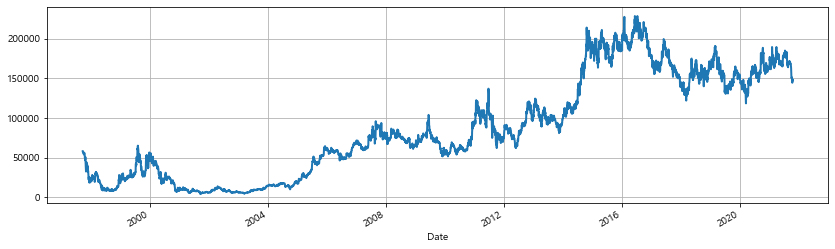

In [87]:
df_cj['Close'].plot()

In [90]:
# 2021년 데이타에서 특정 컬럼만 
# 데이타프레임명[시계열데이타인덱스][컬럼명]
df_cj['2021']['Close']

Date
2021-01-04    168500
2021-01-05    177000
2021-01-06    172000
2021-01-07    174500
2021-01-08    173000
               ...  
2021-10-13    149000
2021-10-14    148000
2021-10-15    148000
2021-10-18    147000
2021-10-19    148000
Name: Close, Length: 196, dtype: int64

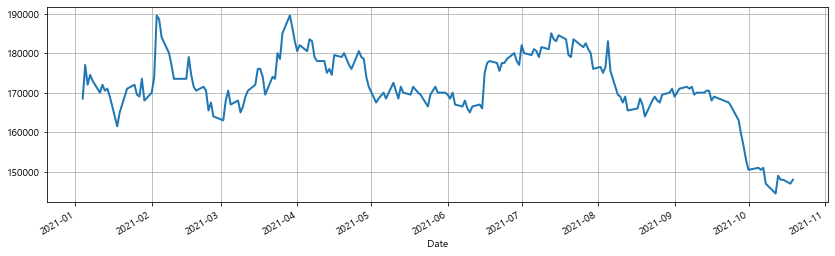

In [96]:
# df_cj['2021-10']['Close'].plot()
df_cj['2021']['Close'].plot()

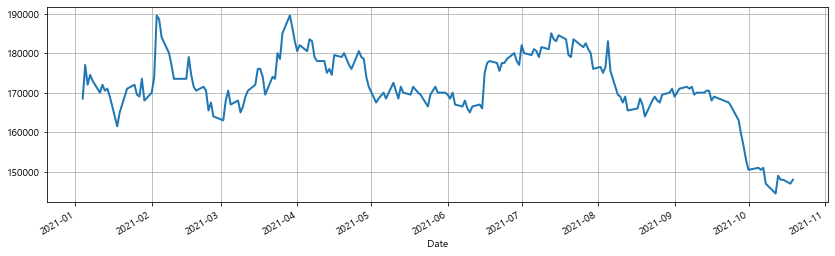

In [101]:
# df_cj['2021'].loc[:, 'Close']
# df_cj['2021']['Close'].plot()
df_cj.loc['2021', 'Close'].plot()
# 이미지 파일로 저장 
plt.savefig('output/cj_graph.png')

In [102]:
ls output

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: DC29-8D46

 C:\workspace2110\scrap\output 디렉터리

2021-10-19  오전 11:48    <DIR>          .
2021-10-19  오전 11:48    <DIR>          ..
2021-10-14  오후 02:46    <DIR>          .ipynb_checkpoints
2021-10-15  오전 10:31             3,040 alexa_topSites.csv
2021-10-15  오전 10:40               668 alexa_topSites10.csv
2021-10-15  오전 10:51               165 alexa_topSites5.csv
2021-10-14  오후 02:47           510,584 alladin.html
2021-10-14  오후 02:47           392,680 alladin2.html
2021-10-19  오전 09:17             6,357 anemone_1.jpg
2021-10-19  오전 09:17            12,511 anemone_10.jpg
2021-10-19  오전 09:17             6,345 anemone_11.jpg
2021-10-19  오전 09:17             4,212 anemone_12.jpg
2021-10-19  오전 09:17             8,786 anemone_13.jpg
2021-10-19  오전 09:17            10,867 anemone_14.jpg
2021-10-19  오전 09:17            10,785 anemone_15.jpg
2021-10-19  오전 09:17            10,772 anemone_16.jpg
2021-10-19  오전 09:17             4,538 anemone_17.jpg
2021-10-1

In [83]:
df_cj.index

DatetimeIndex(['1997-09-20', '1997-09-22', '1997-09-23', '1997-09-24',
               '1997-09-25', '1997-09-26', '1997-09-27', '1997-09-29',
               '1997-09-30', '1997-10-01',
               ...
               '2021-10-05', '2021-10-06', '2021-10-07', '2021-10-08',
               '2021-10-12', '2021-10-13', '2021-10-14', '2021-10-15',
               '2021-10-18', '2021-10-19'],
              dtype='datetime64[ns]', name='Date', length=6000, freq=None)